Amirreza Velae - 400102222

Lab 1 ML&CV Lab

Question: Prove that for a covariance matrix $C$, minimizing the $u^TCu$ subject to $u^Tu=1$ is equivalent to finding the eigenvector of $C$ corresponding to the smallest eigenvalue.

Answer:

Let $C$ be a covariance matrix and $u$ be a unit vector. We want to minimize $u^TCu$ subject to $u^Tu=1$. We can use the method of Lagrange multipliers to solve this problem. We define the Lagrangian as follows:
$$L(u, \lambda) = u^TCu - \lambda(u^Tu - 1)$$
where $\lambda$ is the Lagrange multiplier. We want to minimize $L(u, \lambda)$ with respect to $u$ and $\lambda$. Taking the derivative of $L(u, \lambda)$ with respect to $u$ and $\lambda$ and setting them to zero, we get:
$$\frac{\partial L}{\partial u} = 2Cu - 2\lambda u = 0$$
$$\frac{\partial L}{\partial \lambda} = u^Tu - 1 = 0$$
From the first equation, we have:
$$Cu = \lambda u$$
This equation shows that $u$ is an eigenvector of $C$ with eigenvalue $\lambda$. Since we want to minimize $u^TCu$, we need to find the eigenvector of $C$ corresponding to the smallest eigenvalue. Therefore, minimizing $u^TCu$ subject to $u^Tu=1$ is equivalent to finding the eigenvector of $C$ corresponding to the smallest eigenvalue.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

Load image directories

In [89]:
image_dirs = []
non_red_dirs = []

natural_images_path = 'Data/images/neutral'
for filename in os.listdir(natural_images_path):
    if filename.endswith('.png'):
        if filename[:4] not in non_red_dirs:
            non_red_dirs.append(filename[:4])
            image_dirs.append(natural_images_path + '/' + filename)

print(f"Found {len(image_dirs)} images")

Found 97 images


Load images by cv2

In [90]:
images = []
for img_dir in image_dirs:
    img = cv2.imread(img_dir)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Gray scale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    images.append(gray)

Image dimensions: (600, 300)


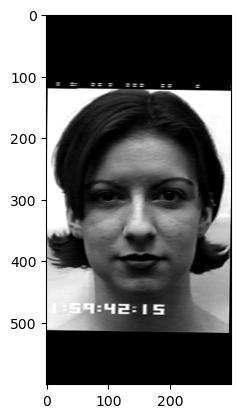

In [91]:
# Show dimensions of the first image
print(f"Image dimensions: {images[0].shape}")
# Show the first image
plt.imshow(images[0], cmap='gray')

Split train and test with 70 images for train

In [92]:
train_images = images[:70]
test_images = images[70:]

Reshape images to vectors

In [93]:
# Reshape images to vectors
train_images_vec = []
for i in range(len(train_images)):
    train_images_vec.append(train_images[i].flatten())
    

Find PCA of train images

In [94]:
# Fit PCA to the training data and get 10 eigenvalues
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(train_images_vec)

PCA(n_components=10)

Show the first 10 eigenvalues

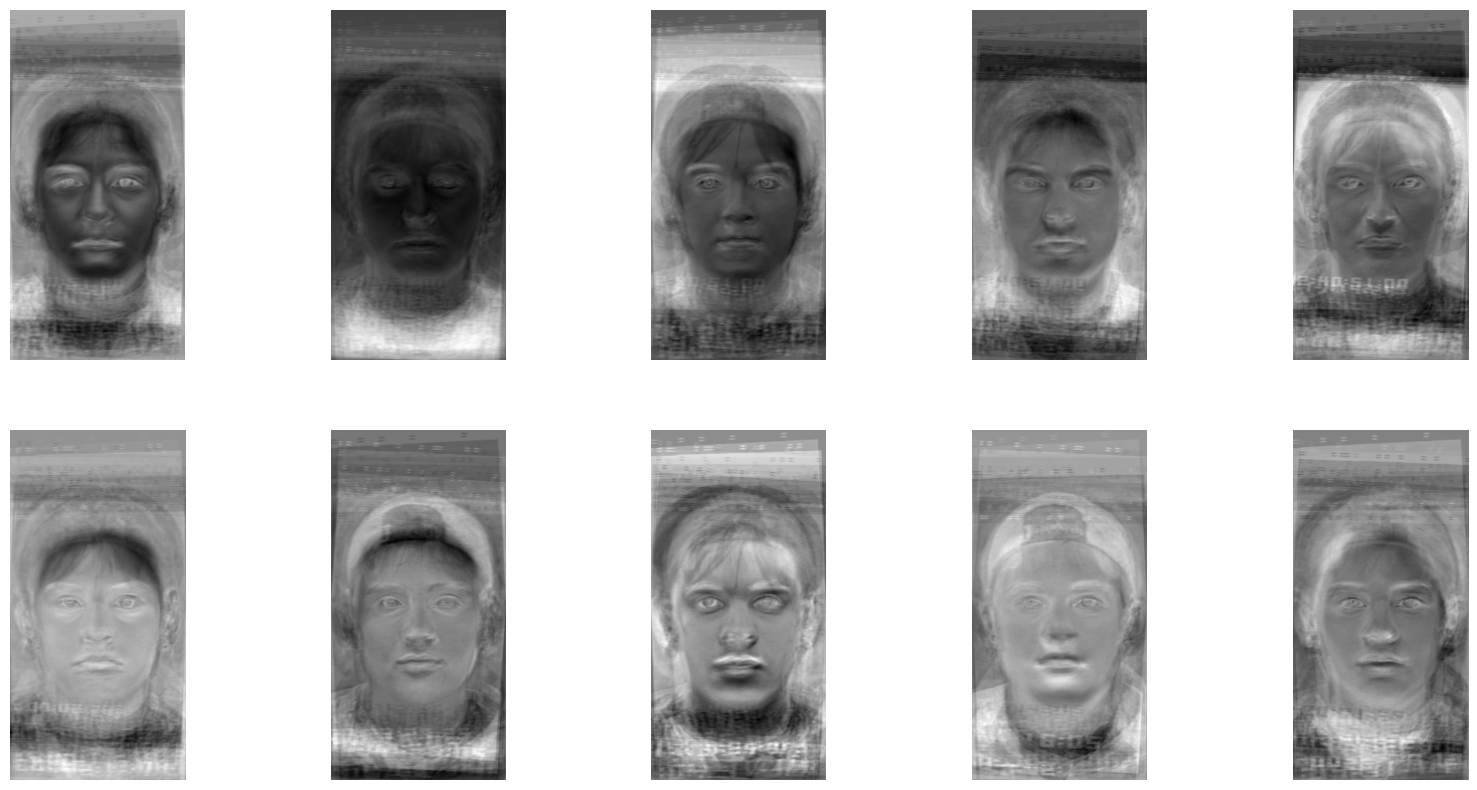

In [95]:
# Get the eigenvecs
eigenvecs = pca.components_
eigenvecs = eigenvecs.reshape(10, 600, 300)

# Show the first 10 eigenvecs
fig, axs = plt.subplots(2, 5, figsize=(20, 10))
for i in range(2):
    for j in range(5):
        axs[i, j].imshow(eigenvecs[i*5+j], cmap='gray')
        axs[i, j].axis('off')
plt.show()

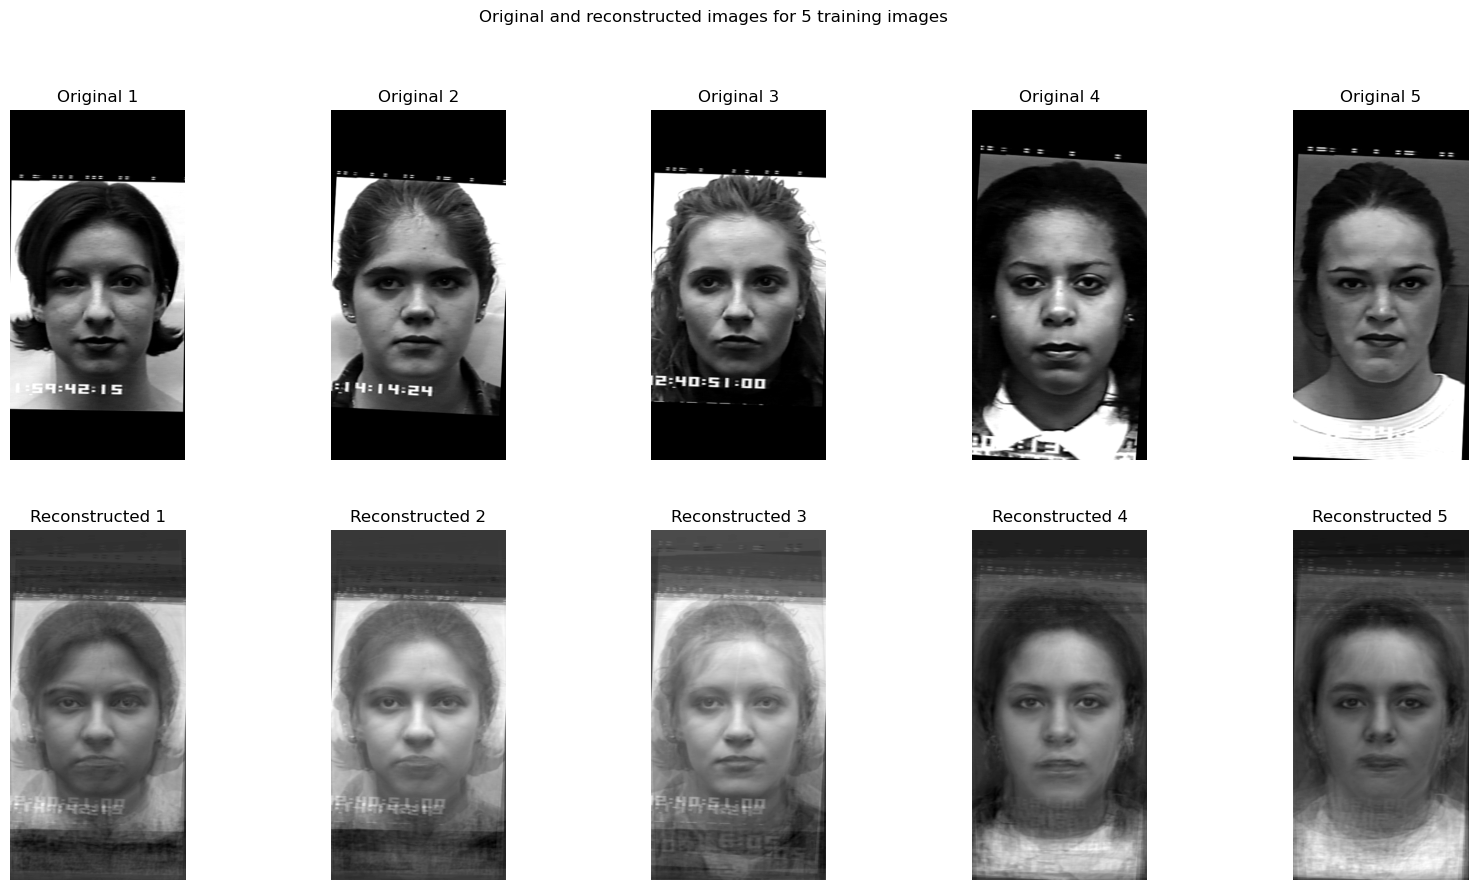

In [96]:
# Map 5 training images to the 10-dimensional space and then back to the original space
sample_size = 5
sample_images = train_images_vec[:sample_size]
sample_images = np.array(sample_images)

# Map to 10-dimensional space
sample_images_10d = pca.transform(sample_images)
# Map back to original space
sample_images_reconstructed = pca.inverse_transform(sample_images_10d)

fig, axs = plt.subplots(2, sample_size, figsize=(20, 10))
for i in range(2):
    for j in range(sample_size):
        if i == 0:
            axs[i, j].imshow(sample_images[j].reshape(600, 300), cmap='gray')
            axs[i, j].set_title(f"Original {j+1}")
        else:
            axs[i, j].imshow(sample_images_reconstructed[j].reshape(600, 300), cmap='gray')
            axs[i, j].set_title(f"Reconstructed {j+1}")
        axs[i, j].axis('off')
plt.suptitle("Original and reconstructed images for 5 training images")
plt.show()


In [97]:
pca = PCA(n_components=30)
pca.fit(train_images_vec)

PCA(n_components=30)

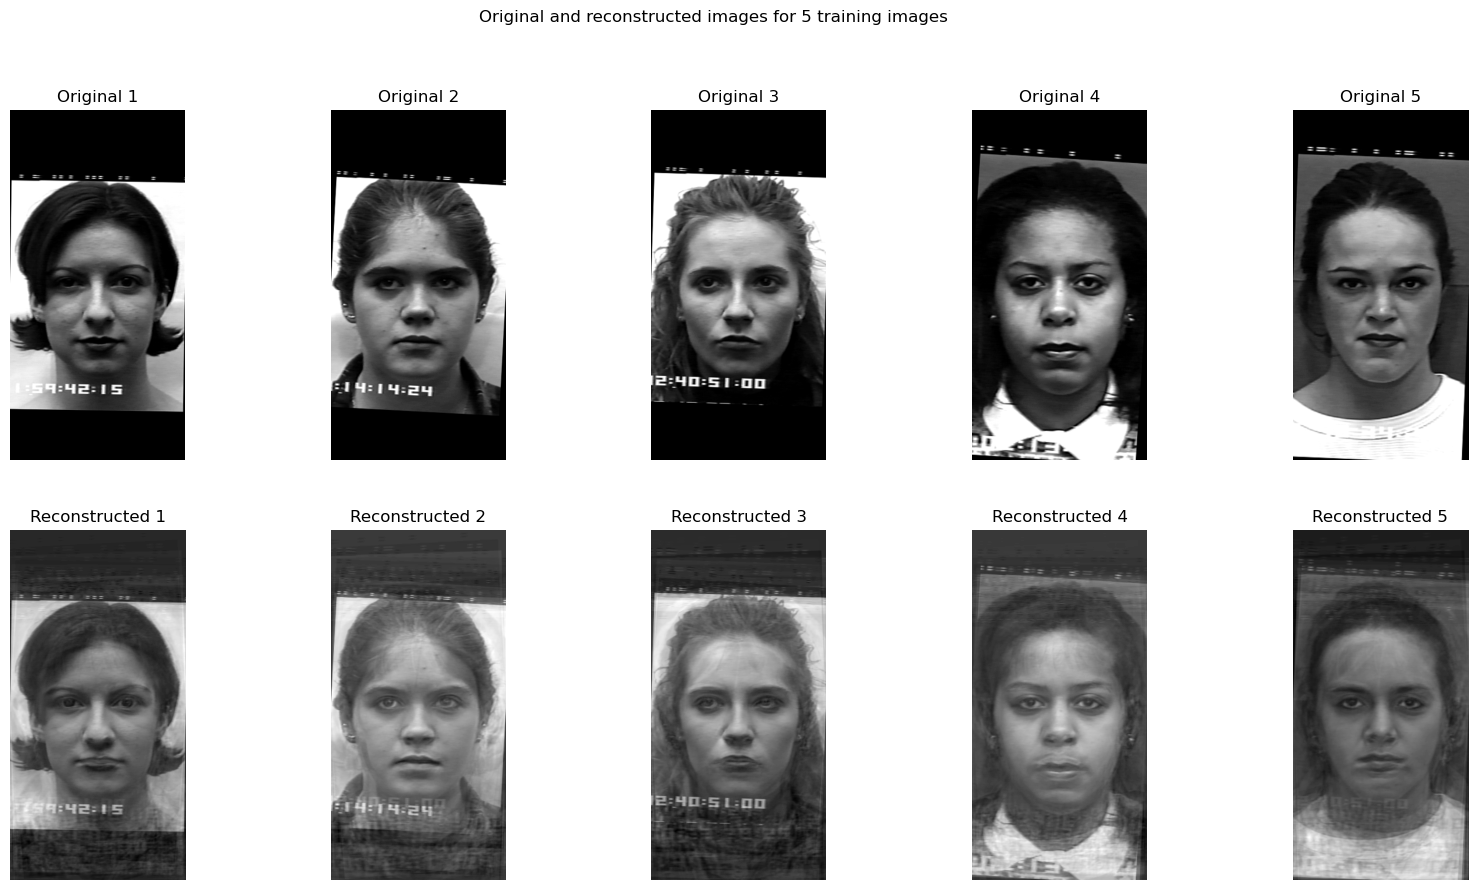

In [98]:
# Map 5 training images to the 10-dimensional space and then back to the original space
sample_size = 5
sample_images = train_images_vec[:sample_size]
sample_images = np.array(sample_images)

# Map to 10-dimensional space
sample_images_10d = pca.transform(sample_images)
# Map back to original space
sample_images_reconstructed = pca.inverse_transform(sample_images_10d)

fig, axs = plt.subplots(2, sample_size, figsize=(20, 10))
for i in range(2):
    for j in range(sample_size):
        if i == 0:
            axs[i, j].imshow(sample_images[j].reshape(600, 300), cmap='gray')
            axs[i, j].set_title(f"Original {j+1}")
        else:
            axs[i, j].imshow(sample_images_reconstructed[j].reshape(600, 300), cmap='gray')
            axs[i, j].set_title(f"Reconstructed {j+1}")
        axs[i, j].axis('off')
plt.suptitle("Original and reconstructed images for 5 training images")
plt.show()


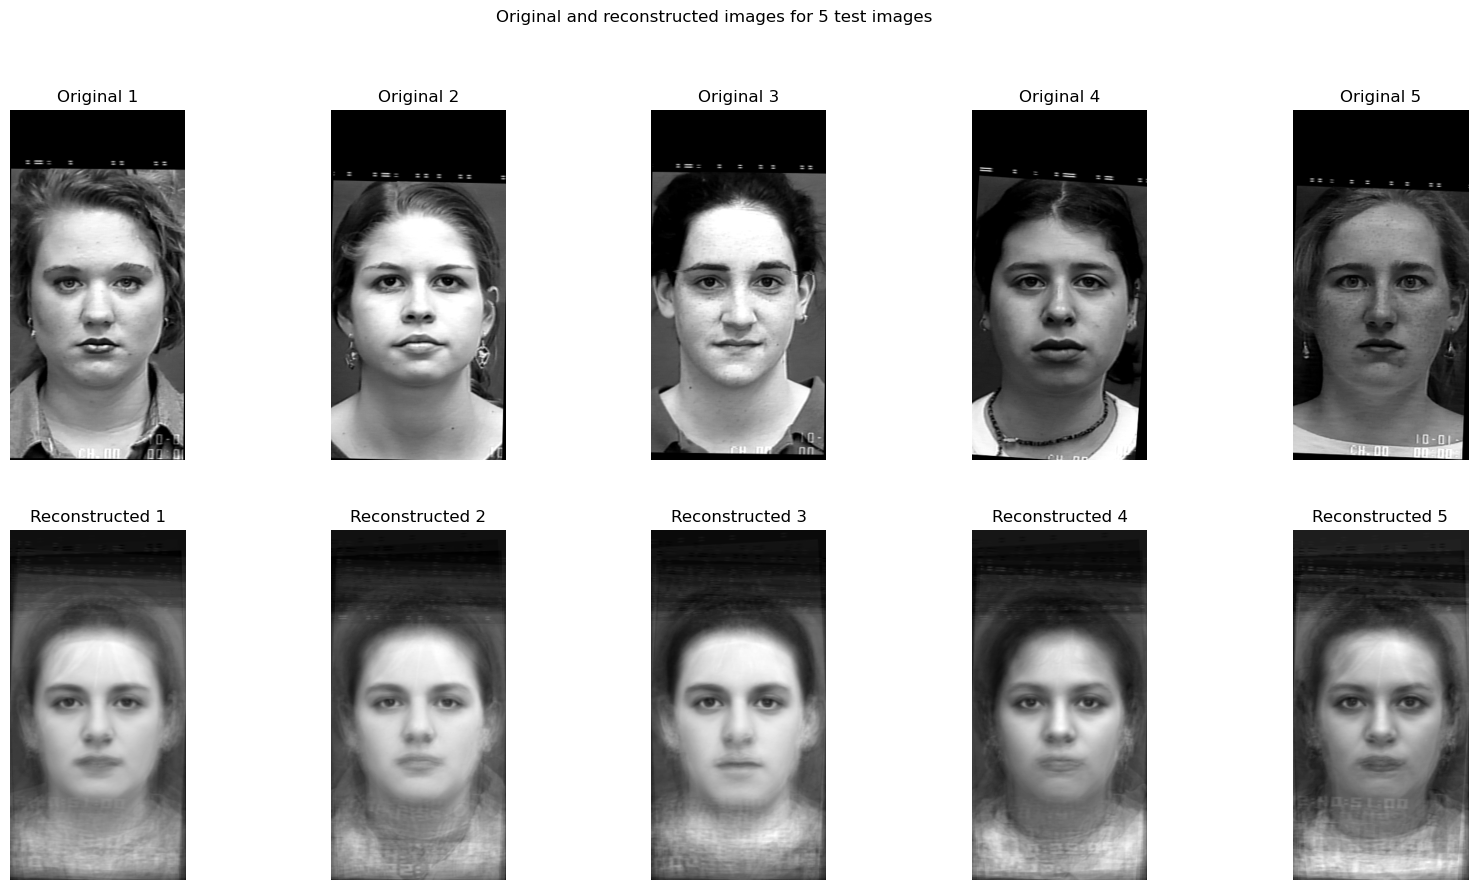

In [31]:
sample_images = test_images[:sample_size]
sample_images_vec = []
for i in range(len(sample_images)):
    sample_images_vec.append(sample_images[i].flatten())
sample_images = np.array(sample_images_vec)

# Map to 10-dimensional space
sample_images_10d = pca.transform(sample_images)
# Map back to original space
sample_images_reconstructed = pca.inverse_transform(sample_images_10d)

fig, axs = plt.subplots(2, sample_size, figsize=(20, 10))
for i in range(2):
    for j in range(sample_size):
        if i == 0:
            axs[i, j].imshow(sample_images[j].reshape(600, 300), cmap='gray')
            axs[i, j].set_title(f"Original {j+1}")
        else:
            axs[i, j].imshow(sample_images_reconstructed[j].reshape(600, 300), cmap='gray')
            axs[i, j].set_title(f"Reconstructed {j+1}")
        axs[i, j].axis('off')
plt.suptitle("Original and reconstructed images for 5 test images")
plt.show()

As it turns out, PCA doesn't peroform well on test dataset, as it doesn't have enough data to learn the features, nor enough eigenvalues to represent the data. However, for train data, it performs well, as it can learn the features and represent the data with the eigenvalues.

Write a function to gather images from the directory

In [36]:
def images_dir_loader(type_of_images):
    image_dirs = []

    natural_images_path = 'Data/images/'+type_of_images
    for filename in os.listdir(natural_images_path):
        if filename.endswith('.png'):
            image_dirs.append(natural_images_path + '/' + filename)

    print(f"Found {len(image_dirs)} images of type {type_of_images}")
    return image_dirs

disgust_images = images_dir_loader('disgust')
happy_images = images_dir_loader('happy')
neutral_images = images_dir_loader('neutral')
suprise_images = images_dir_loader('surprise')

Found 47 images of type disgust
Found 85 images of type happy
Found 190 images of type neutral
Found 88 images of type surprise


Function to load images by cv2, and mask background and hair

In [80]:
def load_and_mask_images(image_paths):
    masked_images = []
    for img_path in image_paths:
        img = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

        # Mask the central part of the image
        mask = np.zeros(gray.shape, np.uint8)
        mask = cv2.ellipse(mask, (150, 300), (130, 180), 0, 0, 360, (255, 255, 255), -1)
        masked_img = cv2.bitwise_and(gray, gray, mask=mask)

        # Crop the image
        masked_img = masked_img[120:480, 20:280]
        masked_images.append(masked_img)
    
    return masked_images

# Example usage
disgust_images_masked = load_and_mask_images(disgust_images)
happy_images_masked = load_and_mask_images(happy_images)
neutral_images_masked = load_and_mask_images(neutral_images)
suprise_images_masked = load_and_mask_images(suprise_images)

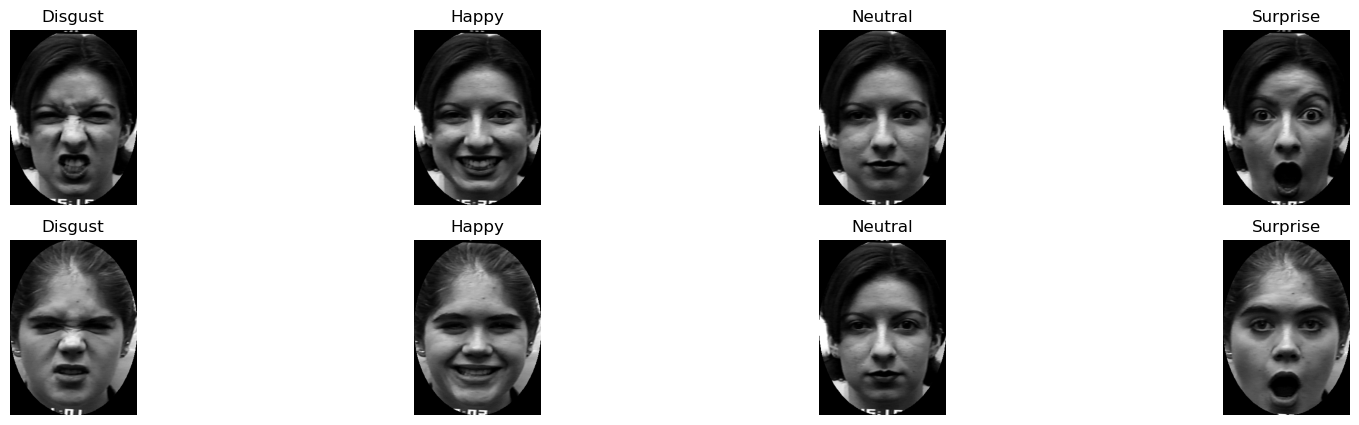

In [81]:
# Show the 2 first masked image of each type
fig, axs = plt.subplots(2, 4, figsize=(20, 5))

for i in range(2):
    axs[i, 0].imshow(disgust_images_masked[i], cmap='gray')
    axs[i, 0].axis('off')
    axs[i, 0].set_title('Disgust')
    
    axs[i, 1].imshow(happy_images_masked[i], cmap='gray')
    axs[i, 1].axis('off')
    axs[i, 1].set_title('Happy')
    
    axs[i, 2].imshow(neutral_images_masked[i], cmap='gray')
    axs[i, 2].axis('off')
    axs[i, 2].set_title('Neutral')
    
    axs[i, 3].imshow(suprise_images_masked[i], cmap='gray')
    axs[i, 3].axis('off')
    axs[i, 3].set_title('Surprise')
    

Sample 10 random images from neutral

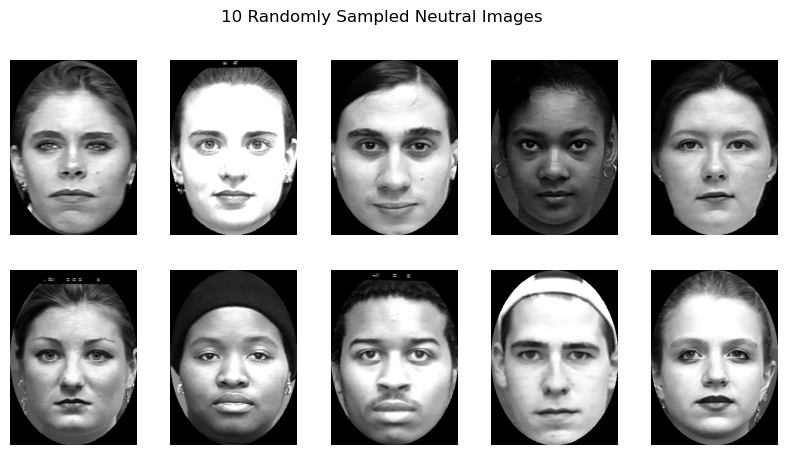

In [84]:
import random

sampled_neutral_images = random.sample(neutral_images_masked, 10)
fig, axs = plt.subplots(2, 5, figsize=(10, 5))
for i in range(2):
    for j in range(5):
        axs[i, j].imshow(sampled_neutral_images[i*5 + j], cmap='gray')
        axs[i, j].axis('off')
plt.suptitle("10 Randomly Sampled Neutral Images")
plt.show()

Function to train PCA on every image type

In [86]:
def get_image_dataset_and_train_pca(image_type, n_components=10):
    image_dirs = images_dir_loader(image_type)
    masked_images = load_and_mask_images(image_dirs)
    image_vectors = [img.flatten() for img in masked_images]
    
    # Train PCA
    pca = PCA(n_components=n_components)
    pca.fit(image_vectors)
    
    return pca

pca_disgust = get_image_dataset_and_train_pca('disgust')
pca_happy = get_image_dataset_and_train_pca('happy')
pca_surprise = get_image_dataset_and_train_pca('surprise')

Found 47 images of type disgust
Found 85 images of type happy
Found 88 images of type surprise


In [87]:
def transform_inverse_transform_images(pca, images):
    images_vec = [img.flatten() for img in images]
    images_10d = pca.transform(images_vec)
    images_reconstructed = pca.inverse_transform(images_10d)
    
    return images_reconstructed

sampled_neutral_images_reconstructed_disgust = transform_inverse_transform_images(pca_disgust, sampled_neutral_images)
sampled_neutral_images_reconstructed_happy = transform_inverse_transform_images(pca_happy, sampled_neutral_images)
sampled_neutral_images_reconstructed_surprise = transform_inverse_transform_images(pca_surprise, sampled_neutral_images)

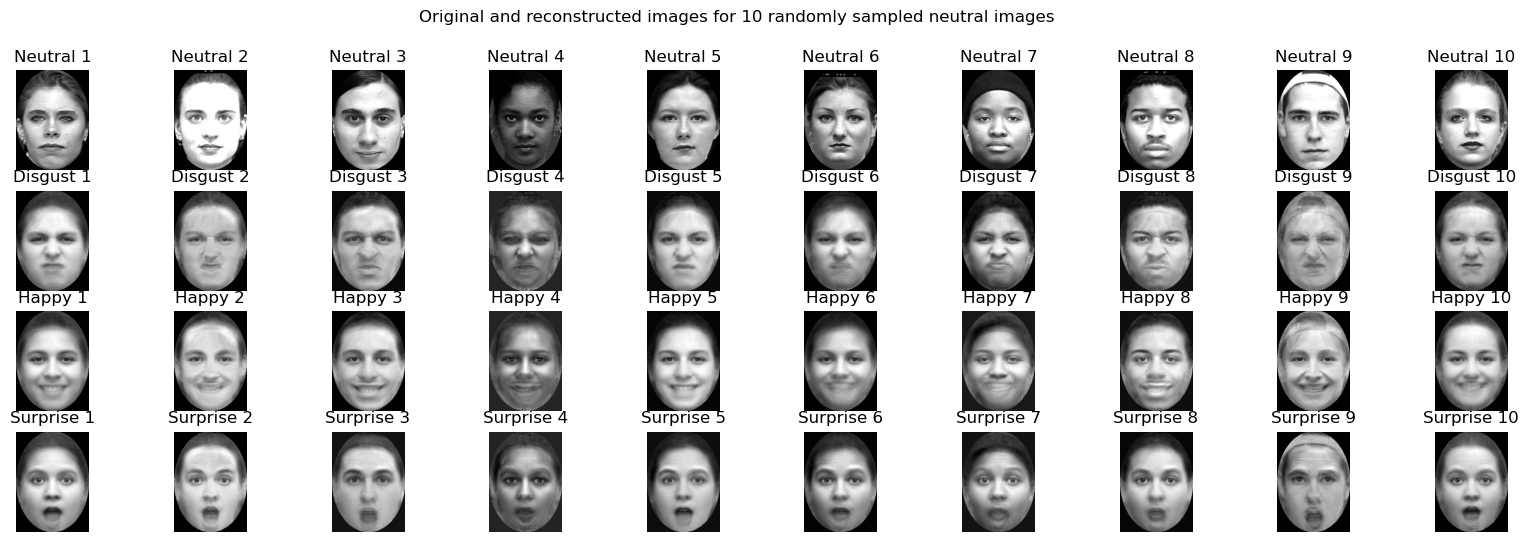

In [88]:
# Show the original and reconstructed images
fig, axs = plt.subplots(4, 10, figsize=(20, 6))
for i in range(4):
    for j in range(10):
        if i == 0:
            axs[i, j].imshow(sampled_neutral_images[j], cmap='gray')
            axs[i, j].set_title(f"Neutral {j+1}")
        elif i == 1:
            axs[i, j].imshow(sampled_neutral_images_reconstructed_disgust[j].reshape(360, 260), cmap='gray')
            axs[i, j].set_title(f"Disgust {j+1}")
        elif i == 2:
            axs[i, j].imshow(sampled_neutral_images_reconstructed_happy[j].reshape(360, 260), cmap='gray')
            axs[i, j].set_title(f"Happy {j+1}")
        else:
            axs[i, j].imshow(sampled_neutral_images_reconstructed_surprise[j].reshape(360, 260), cmap='gray')
            axs[i, j].set_title(f"Surprise {j+1}")
        axs[i, j].axis('off')
plt.suptitle("Original and reconstructed images for 10 randomly sampled neutral images")
plt.show()


Personality and different face features has been learned by PCA, but not well enough. It's not possible to learn all the features with only 10 eigenvalues. However, it can learn some features, and represent the data with the eigenvalues.

Surprise emotion has been learned by PCA, why? Because it has the most different features from other emotions, the mouth is open, and the eyes are wide open. It's easier to learn the features of surprise emotion. However, Happy emotion has been learned the worse, because it has the most common features with neutral emotion, with a smile on the face. This makes it harder to learn the features of happy emotion. Disgust emotion has been learned the worst, because it has the least different features from other emotions, with a frown on the face. This shows that PCA of disgust emotion and neutral emotion are very similar, making it harder to learn the features of disgust emotion.